<a href="https://colab.research.google.com/github/eriqneo/Portfolio-Projects/blob/main/Blockchain2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import json
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt

In [30]:
#Load data from file

with open('n-transactions.json', 'r') as f:
  data = json.load(f)

transaction_data = data['n-transactions']

#convert data to dataframe

df = pd.DataFrame(transaction_data)

#df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

df.head()

,x,y
0,1675036800000,309909
1,1675123200000,313500
2,1675209600000,345561
3,1675296000000,340169
4,1675382400000,315951


In [31]:
#change datatype to datetime and colun name to timestamp
df['timestamp'] = pd.to_datetime(df['x'], unit='ms')

#clear the name column 'x'
df.drop(columns=['x'], inplace=True)

#Rename 'y' column to transactions
df.rename(columns={'y': 'transactions'}, inplace=True)

df.head(10)

,transactions,timestamp
0,309909,2023-01-30
1,313500,2023-01-31
2,345561,2023-02-01
3,340169,2023-02-02
4,315951,2023-02-03
5,304495,2023-02-04
6,254113,2023-02-05
7,301977,2023-02-06
8,300429,2023-02-07
9,316963,2023-02-08


In [26]:
import numpy as np
#lets check if there is missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{}-{}'.format(col,pct_missing))


transactions-0.0
timestamp-0.0


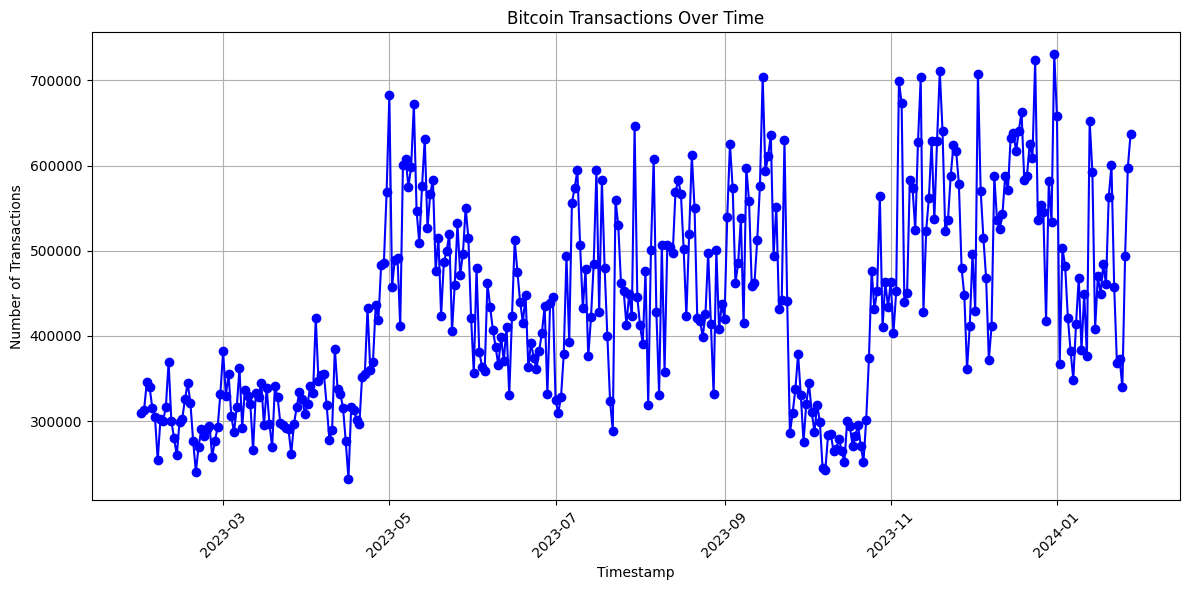

In [28]:
# Visualize Transaction Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['transactions'], color='blue', marker='o', linestyle='-')
plt.title('Bitcoin Transactions in 2023')
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# prompt: Using dataframe df: find highest transcation and in which date

df[df['transactions'] == df['transactions'].max()]['timestamp']


335   2023-12-31
Name: timestamp, dtype: datetime64[ns]

In [36]:
# Find the index of the row with the highest transaction
max_transaction_index = df['transactions'].idxmax()

# Get the corresponding timestamp using the index
highest_transaction_timestamp = df.loc[max_transaction_index, 'timestamp']

# Get the value of the highest transaction
highest_transaction_value = df.loc[max_transaction_index, 'transactions']

print("Highest Transaction:")
print("Timestamp:", highest_transaction_timestamp)
print("Transaction Value:", highest_transaction_value)


Highest Transaction:
Timestamp: 2023-12-31 00:00:00
Transaction Value: 731351


In [37]:
# Find the index of the row with the highest transaction
min_transaction_index = df['transactions'].idxmin()

# Get the corresponding timestamp using the index
lowest_transaction_timestamp = df.loc[min_transaction_index, 'timestamp']

# Get the value of the highest transaction
lowest_transaction_value = df.loc[min_transaction_index, 'transactions']

print("Lowest Transaction:")
print("Timestamp:", lowest_transaction_timestamp)
print("Transaction Value:", lowest_transaction_value)


Lowest Transaction:
Timestamp: 2023-04-16 00:00:00
Transaction Value: 232268


Lets do statistical analysis for this data


In [40]:
#Headline
print ("Statisstical Analysis")

#Mean Transsaction Value
mean_transc = df['transactions'].mean()
print("Mean Transaction Value:", mean_transc)

#Median Transaction Value
median_transc = df['transactions'].median()
print("Median Transaction Value:", median_transc)

# Standard deviation of transaction values
std_dev_transc = df['transactions'].std()
print("Standard Deviation of Transaction Values:", std_dev_transc)

# Total number of transactions
total_transc = df['transactions'].sum()
print("Total Number of Transactions:", total_transc)


Statisstical Analysis
Mean Transaction Value: 435387.51923076925
Median Transaction Value: 423163.0
Standard Deviation of Transaction Values: 118387.83339379649
Total Number of Transactions: 158481057


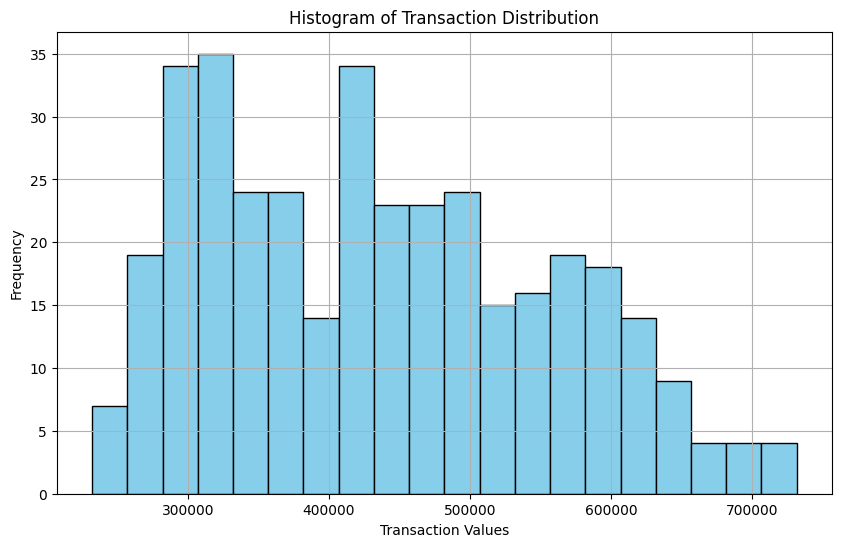

In [41]:
# Histogram of Transaction Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['transactions'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Distribution')
plt.xlabel('Transaction Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

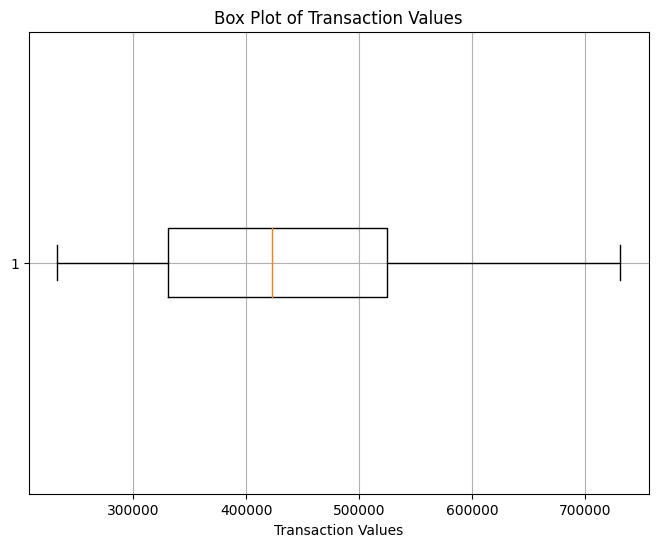

In [42]:
# Box Plot of Transaction Values
plt.figure(figsize=(8, 6))
plt.boxplot(df['transactions'], vert=False)
plt.title('Box Plot of Transaction Values')
plt.xlabel('Transaction Values')
plt.grid(True)
plt.show()

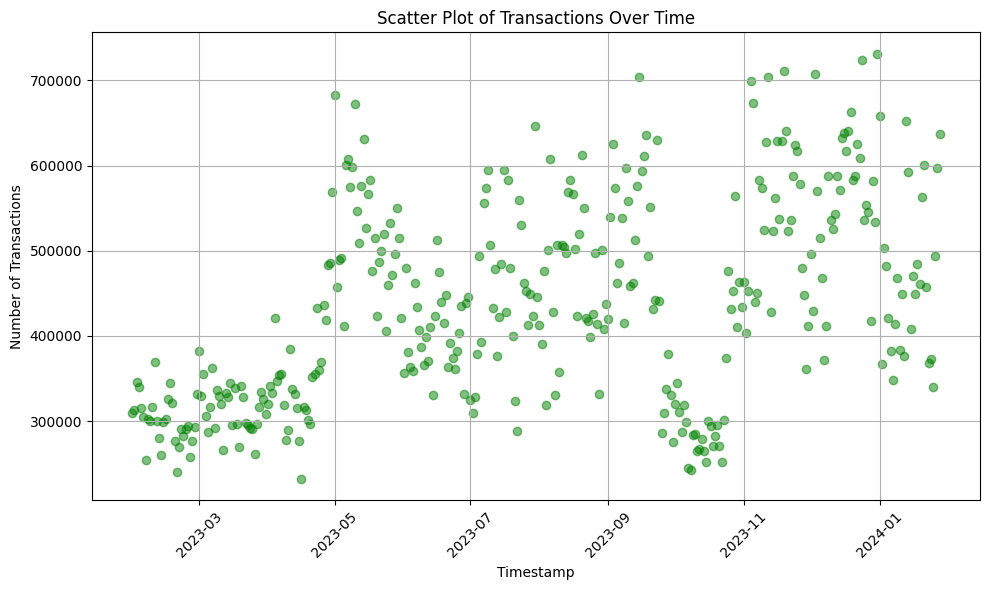

In [43]:
# Scatter Plot of Transactions Over Time
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['transactions'], color='green', alpha=0.5)
plt.title('Scatter Plot of Transactions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

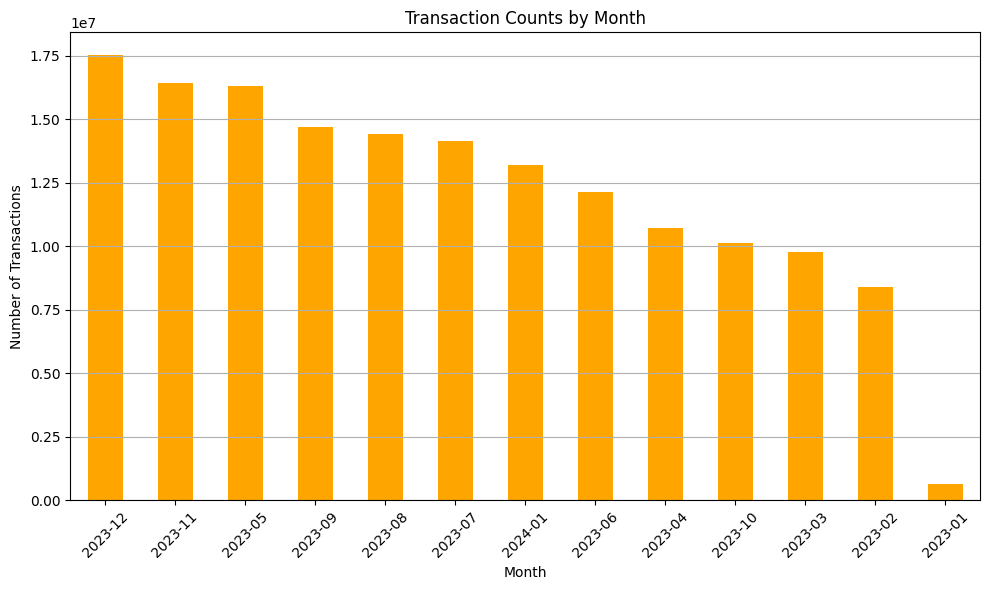

In [45]:
# Bar Chart of Transaction Counts by Time Period (e.g., month)
df['month'] = df['timestamp'].dt.to_period('M')  # Group by month
transaction_counts = df.groupby('month')['transactions'].sum()
# Sort the transaction counts by month in descending order
sorted_transaction_counts = transaction_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_transaction_counts.plot(kind='bar', color='orange')
plt.title('Transaction Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()